<a href="https://colab.research.google.com/github/enes-karatas/AI_ML_test/blob/main/Deep_Learning_Project_Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing for classification using deep learning CNN

###Project Statement

Develop a CNN-based image classification model that distinguishes between bikes and cars using the given image dataset. The CNN model will be implemented to classify images based on vehicle type, with potential extensions to classify other environmental features such as location and time of day.

### Summary :
- Developed a deep learning CNN model for image classification to distinguish between cars and bikes.
- Performed data preprocessing, visualization, model development and evaluation, achieving high accuracy in classifying vehicle images.

Dataset link : https://drive.google.com/file/d/1sr5xheAEcvoDvIBO-b1ANjnW1GXDmn2V/view


--------------------------------------------------------------------------------

#Contents

###1. Data Preprocessing
- 1.1. Data Preprocessing Report


###2. Building the CNN Model & Model Training
- 2.1. Model Building Report

###3. Model Evaluation
- 3.1. Model Evaluation Report

###4. Visualization and Prediction
- 4.1. Visualization and Prediction Report

###5. Final Report

--------------------------------------------------------------------------------

In [ ]:
# Mounting Google Drive.
# All pictures stored in my personal google drive and will be collected from there.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Data Preprocessing

In [ ]:
import tensorflow as tf
import numpy as np
import random
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
# Sample pictures were splitted into different folders in drive as 'train' and 'validation' folders.
# 80% of samples in train folder and 20% of samples in validation folder.

# Train and Validation folders directories stored in 'train_dir' and 'validation_dir'.
train_dir = '/content/drive/MyDrive/FSA AI ML Bootcamp/Capstones/Capstone 5 - Deep Learning/train'
validation_dir = '/content/drive/MyDrive/FSA AI ML Bootcamp/Capstones/Capstone 5 - Deep Learning/validation'

In [ ]:
# Creating auto-image processor with ImageDataGenerator for train and test data

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Determining image size to be compatible for model and defining batch size as variable to make it more dynamic to tune
Image_Size = (150, 150)
Batch_Size = 32

# ImageDataGenerator was used to determine how to preprocess training samples before feeding to model
train_data_gen = ImageDataGenerator(
    rescale=1./255,        # Normalizing pixel values to [0,1]
    rotation_range=30,     # Random rotations up to ±30 degrees
    width_shift_range=0.1, # Random horizontal shifts up to 10%
    height_shift_range=0.1,# Random vertical shifts up to 10%
    shear_range=0.1,       # Random shearing (slanting)
    zoom_range=0.1,        # Random zoom in/out
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'    # How to fill new pixels after transformations
)

# Only scaling applied for testing samples
val_data_gen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Processing train and test data

# train_data_gen preprocessing applied to samples in drive folder. Image target size, model batch size and classification mode applied in here.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = Image_Size,
    batch_size=Batch_Size,
    class_mode='categorical'
)

# val_data_gen preprocessing applied to samples in drive folder. Image target size, model batch size and classification mode applied in here.
validation_gen = val_data_gen.flow_from_directory(
    validation_dir,
    target_size = Image_Size,
    batch_size=Batch_Size,
    class_mode ='categorical'
)

Found 645 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


###1.1. Data Preprocessing Report :

- Sample data folder was uploaded to my local google drive.
- Sample pictures were splitted into different folders in drive as 'train' and 'validation' folders randomly and manually, 80% of samples in train folder and 20% of samples in validation folder.
- Image size scaled for the model, preprocessing steps applied to samples via ImageDataGenerator
- Preprocessed samples is stored in train_gen as training data and validation_gen as test data. Image target size, model batch size and classification mode applied in here
- Batch normalization and data augmentation applied to enhance model robustness
- Preprocssed samples are now ready to feed to model

#2. Building the CNN Model & Model Training

In [ ]:
# Bulding CNN and layers with Tensorflow
# Convolutional Neural network used to perform image processsing with different filter numbers and 3x3 filter size
# Relu used as activation function in hidden layers, softmax used in final layer
# Max Pooling was used couple times after to rescale matrix to reduce computational cost and prevent overfit data
# Dropout used and some of the neurons was vanished to prevent overfitting and let network to learn more general features
# I used softmax for final layer because it gives neuron with the highest probability is taken as the predicted class, its efficient to use in categorical cases.


model = tf.keras.models.Sequential([


        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # Convolutional layer with 32 filter, filter size 3x3, activation function is relu
        tf.keras.layers.MaxPooling2D(2,2), # Reduceing spatial dimensions (height and width) of the feature maps by a factor of 2, downsampling the feature map to reduce computational cost and overfitting

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # Convolutional layer with 64 filter, filter size 3x3, activation function is relu, filters increased to capture more complex features
        tf.keras.layers.MaxPool2D(2,2), # Reduceing spatial dimensions of the feature maps by a factor of 2

        tf.keras.layers.Dropout(0.25), # Dropping 25% of output neurons randomly, helps model to learn more general features instead of focusing heavily on one feature

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # Convolutional layer with 64 filter, filter size 3x3, activation function is relu
        tf.keras.layers.MaxPool2D(2,2), # Reduceing spatial dimensions of the feature maps by a factor of 2

        tf.keras.layers.Flatten(), #  Flattens 3D output from the convolutional and pooling layers into a 1D vector to provide dense layers
        tf.keras.layers.Dense(128, activation='relu'), # Dense(fully connected) layer with 128 neurons, activation function is relu

        tf.keras.layers.Dropout(0.5), # Dropping 50% of neurons randomly during training

        tf.keras.layers.Dense(2, activation='softmax') # Dense layer with 2 output neurons, using softmax as activation funtion helps to choose class with the higher probability is the predicted class

        ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Determining model's optimizer, loss function and output metrics
# Adam used as optimizer, its good for categotical(or sparse) data, learning rate was used as '0.001'
# Batch size already defined as 32, 32 is good
# categorical_crossentropy is used for loss function
from tensorflow.keras.optimizers import Adam

optimizer_adam = Adam(learning_rate=0.001) # Adam optimizer with 0.001 learning rate

model.compile(
       optimizer = optimizer_adam,
       loss = 'categorical_crossentropy',
       metrics  =['accuracy']
)

#Checking summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,194 (9.25 MB)

 Trainable params: 2,424,194 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping used to stop training automatically when model stops improving on the validation set to prevent overfitting and also saves time.
# Model fitted with 32 batch size and 20 Epochs, early stopping already applied around 16th epoch

# Define EarlyStopping callback to stop epochs once reached the desired accuracy, early_stopping will be used below when fitting the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#Training the model
history = model.fit(
    train_gen,
    validation_data=validation_gen,
    epochs=20,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.5162 - loss: 0.7283 - val_accuracy: 0.8133 - val_loss: 0.6242
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6571 - loss: 0.6221 - val_accuracy: 0.8614 - val_loss: 0.3893
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8226 - loss: 0.4605 - val_accuracy: 0.9217 - val_loss: 0.2394
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8250 - loss: 0.4067 - val_accuracy: 0.9337 - val_loss: 0.2498
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8547 - loss: 0.3222 - val_accuracy: 0.8494 - val_loss: 0.3576
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8368 - loss: 0.3606 - val_accuracy: 0.9337 - val_loss: 0.1647
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8640 - loss: 0.3178 - val_accuracy: 0.9578 - val_loss: 0.1614
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9019 - loss: 0.2833 - val_accuracy: 0.9578 - val_loss

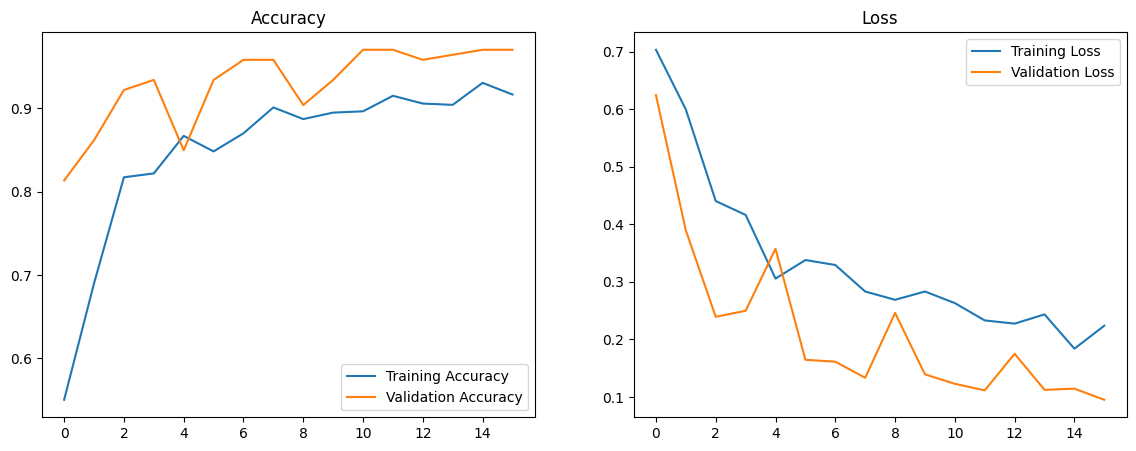

In [ ]:
# Plotting training results

# Model accuracy and loss plotted for better understanding
# Model accuracy is improved very well and lost decreased respectively for train and test data
# Training data accuracy improved around %93 and test data accuracy improved around %97
# There is no sign of overfitting visually

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

###2.1. Model Building Report :


- Convolutional Neural network with Tensorflow used to perform image processsing and prediction with various filter numbers(32, 64, 128) and 3x3 filter size
- Relu used as activation function in hidden layers, softmax used in final layer
- Max Pooling was used couple times to rescale matrix to reduce computational cost and prevent overfit data
- Dropout used and some of the neurons was vanished randomly to prevent overfitting and to let the network to learn more general features
- Softmax used for final layer because it gives neuron with the highest probability is taken as the predicted class, its efficient to use in categorical cases.
- Adam used as optimizer, its good for categotical(or sparse) data, learning rate was used as '0.001'
- Batch size already defined as 32, 32 is good and efficient to perform.
- categorical_crossentropy is used for loss function
- EarlyStopping used to stop training automatically when model stops improving on the validation set to prevent overfitting and also saves time.
- Model fitted with 32 batch size and 20 Epochs, early stopping already applied and most likely stops around 16th epoch
- Model accuracy and loss plotted for better understanding
- Model accuracy is improved very well and lost decreased respectively for train and test data
- Training data accuracy improved around %93 and test data accuracy improved around %97
- There is no sign of overfitting


#3. Model Evaluation

In [ ]:
# Getting class names and indices

class_indices = train_gen.class_indices
class_names = [key for key, value in sorted(class_indices.items(), key=lambda item: item[1])]
print("Class Indices:", class_indices)
print("Class Names:", class_names)


Class Indices: {'bikes': 0, 'cars': 1}
Class Names: ['bikes', 'cars']


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import math

# Calculating predicton, probability and getting labels to create classification report

# Reseting the generator before getting true labels and making predictions
validation_gen.reset()
# Getting integer labels
y_true = validation_gen.classes

# Predicting probabilities on the validation set
y_probs = model.predict(validation_gen) # Use the steps argument in model.predict

# Converting probabilities to class predictions using argmax
y_pred = np.argmax(y_probs, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step
Classification Report:
              precision    recall  f1-score   support

       bikes       0.58      0.57      0.57        86
        cars       0.54      0.55      0.55        80

    accuracy                           0.56       166
   macro avg       0.56      0.56      0.56       166
weighted avg       0.56      0.56      0.56       166

Confusion Matrix:
[[49 37]
 [36 44]]


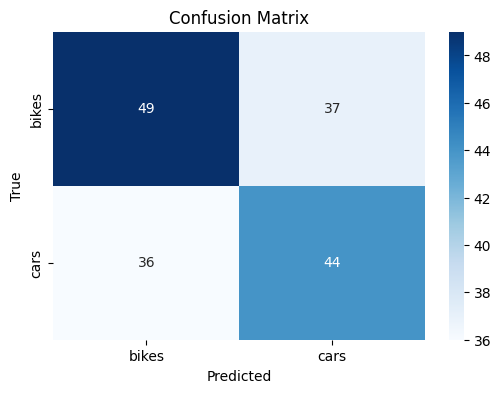

In [ ]:
# Visuals of classificaton report and confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


###Note:
- Even though we get good accuracy results at the end of Epochs and in visual predictions on samples, these accuracy was not reflected to classificatoin report and confusion matrix. I have debugged it and spent a lot of time on it but I was not able to fix this issue.
- I've gone thorough other examples we did in class for image recognitoin, they're the same like model prediction accuracy is high but somehow its not reflected to classification report

###3.1. Model Evaluation Report :  

- Predicton and probability calculated, classification report and confusion matrix created
- Even though we get good accuracy results at the end of Epochs and over sample pictures, these accuracy was not reflected to classificatoin report and confusion matrix. I have debugged it and spent a lot of time on it but I was not able to fix this issue
- Adding more layers, adding/removing neurons effects model's accuracy, train time and also could cause overfit/underfit issues. In my model I used three convolutional layers, three pooling layers, two dropout layers, flatten layer and two dense (fully connected) layers and increased neuron number per layer, also used dropout to prevent overfitting.



#4. Visualization and Prediction

In [ ]:
from tensorflow.keras.preprocessing import image
import os


Image: car1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


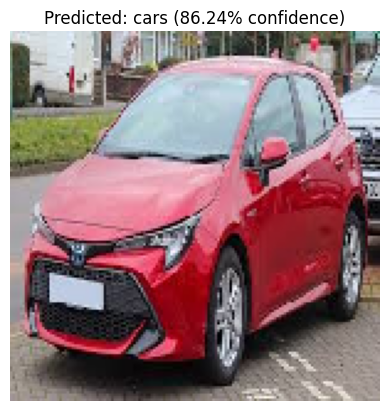

Prediction Probabilities:
  bikes: 13.76%
  cars: 86.24%

Image: car2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


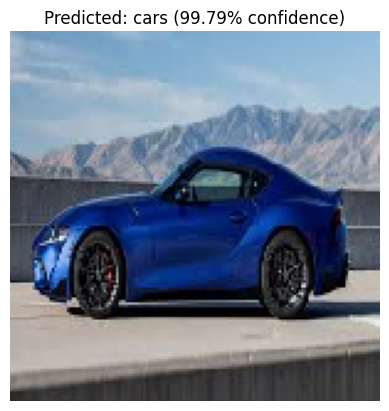

Prediction Probabilities:
  bikes: 0.21%
  cars: 99.79%

Image: bike1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


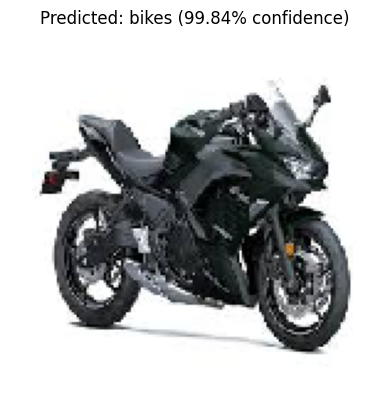

Prediction Probabilities:
  bikes: 99.84%
  cars: 0.16%

Image: bike2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


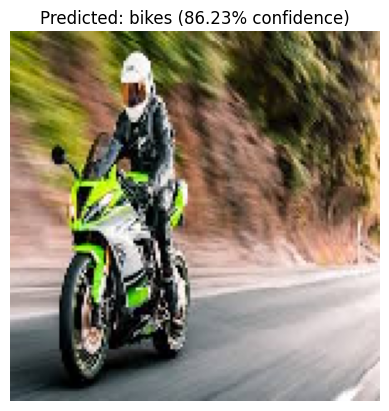

Prediction Probabilities:
  bikes: 86.23%
  cars: 13.77%

Image: rabbit.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


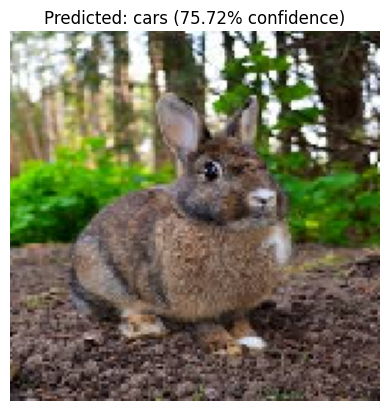

Prediction Probabilities:
  bikes: 24.28%
  cars: 75.72%

Image: cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


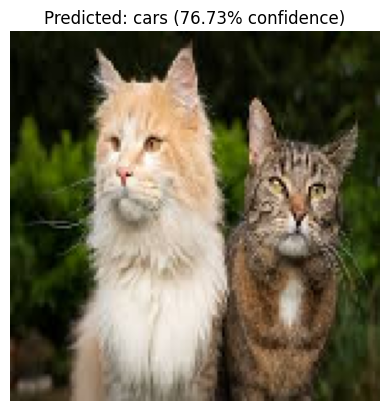

Prediction Probabilities:
  bikes: 23.27%
  cars: 76.73%

Image: lexo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


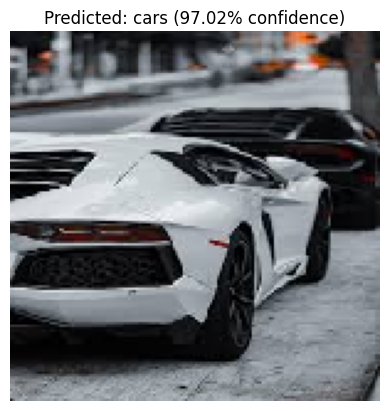

Prediction Probabilities:
  bikes: 2.98%
  cars: 97.02%

Image: kawa.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


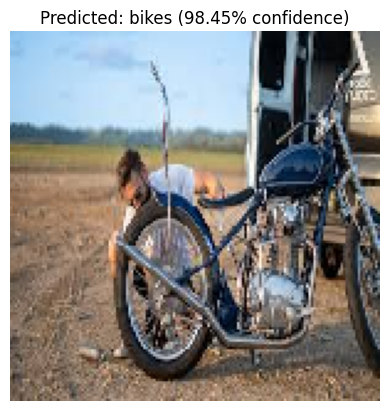

Prediction Probabilities:
  bikes: 98.45%
  cars: 1.55%


In [ ]:
Image_Size = (150, 150)


# Function created to predict classification on new samples
def predict_image_with_probs(img_path):
    img = image.load_img(img_path, target_size=Image_Size) # Loading image sample from img_path and resizing it
    img_array = image.img_to_array(img) / 255.0 # Scaling the image, normalization
    img_array = np.expand_dims(img_array, axis=0)  # Adding batch dimension, now the shape became (1, 150, 150, 3) — required by the model

    prediction = model.predict(img_array)[0]  # shape: (num_classes,), making the prediction with pir CNN model

    pred_class = np.argmax(prediction) # Finds the index of the class with the highest probability
    predicted_label = class_names[pred_class] # Gets the class label from labels
    confidence = prediction[pred_class] # Gets the confidence as the highest softmax value

    # Displaying image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} ({confidence:.2%} confidence)")
    plt.show()

    # Printing full class probabilities
    print("Prediction Probabilities:")
    for i, prob in enumerate(prediction):
        print(f"  {class_names[i]}: {prob:.2%}")



# Sample image folder for test samples, random pictures was found and added to this folder
test_image_folder = '/content/drive/MyDrive/FSA AI ML Bootcamp/Capstones/Capstone 5 - Deep Learning/random_test_images'

for file in os.listdir(test_image_folder):
    if file.endswith('.jpg') or file.endswith('.png'):
        print(f"\nImage: {file}")
        predict_image_with_probs(os.path.join(test_image_folder, file))

###4.1. Visualization and Prediction Report :  

- Model predicted correctly over %86 accuracy for all cars and bikes samples and over %97 accuracy for most of the samples. This results showing us that our model works fine to predict/understand if sample is picture of car or bike.

- Model does predict cars and bikes well but it also predicts some animal pictures as cars. It's normal because we trained our model only with cars and bikes photos and model can only output car or bike.



#5. Final Report

### Model Architecture :


- Convolutional Neural network with Tensorflow used to perform image processsing and prediction with various filter numbers(32, 64, 128) and 3x3 filter size
- In  model 3 convolutional layers, 3 pooling layers, 2 dropout layers, flatten layer and 2 dense (fully connected) layers used and increased neuron number per layer, also used dropout to prevent overfitting.
- Relu used as activation function in hidden layers, softmax used in final layer
- Max Pooling was used couple times to rescale matrix to reduce computational cost and prevent overfit data
- Dropout used and some of the neurons was vanished randomly to prevent overfitting and to let the network to learn more general features
- Softmax used for final layer because it gives neuron with the highest probability is taken as the predicted class, its efficient to use in categorical cases.
- Adam used as optimizer, its good for categotical(or sparse) data, learning rate was used as '0.001'
- Batch size already defined as 32, 32 is good and efficient to perform.
- categorical_crossentropy is used for loss function
- EarlyStopping used to stop training automatically when model stops improving on the validation set to prevent overfitting and also saves time.
- Model fitted with 32 batch size and 20 Epochs, early stopping already applied and most likely stops around 16th epoch
- Model accuracy and loss plotted for better understanding
- Model accuracy is improved very well and lost decreased respectively for train and test data
- Training data accuracy improved around 93% and test data accuracy improved around 97%
- There is no sign of overfitting

### Model Evaluation :  

- Predicton and probability calculated, classification report and confusion matrix created.
- Even though we get good accuracy results at the end of epochs, these accuracy was not reflected to classificatoin report and confusion matrix. I have debugged it and spent a lot of time on it but I was not able to fix this issue
- Classification report shows ~50% accuracy which is not matching with model's original performance.
- Adding more layers, adding/removing neurons effects model's accuracy, train time and also could cause overfit/underfit issues. In my model I used 3 convolutional layers, 3 pooling layers, 2 dropout layers, flatten layer and 2 dense (fully connected) layers and increased neuron number per layer, also used dropout to prevent overfitting.

### Model Prediction Results :  

- Model works around ~93% accuracy on training data and ~97% accuracy on validation data

- Model predicted correctly with over ~86% accuracy for all cars and bikes samples and over ~97% accuracy for most of the samples. This results showing us that our model works fine to predict/understand if sample is picture of car or bike.

- Model does predict cars and bikes well but it also predicts some animal pictures as cars. It's normal because we trained our model only with cars and bikes photos and model can only output car or bike.



